In [1]:
from lsst.sims.maf.db import OpsimDatabase
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as mb

If you need to calculate the metric data from scratch execute the following cells. Otherwise skip down to the 'read from disk' cell (5th from top).

In [2]:
opsdb = OpsimDatabase('/Users/lynnej/opsim/db/enigma_1189_sqlite.db')
opsimName = 'enigma_1189'
#opsdb = OpsimDatabase('/Users/lynnej/opsim/db/minion_1016_sqlite.db')
#opsimName = 'minion_1016'

In [3]:
m = metrics.CountMetric(col='expMJD', metricName='NVisits')
s = slicers.OpsimFieldSlicer()
constraint = '(filter="g") or (filter="r") or (filter="i")'
bundle = mb.MetricBundle(metric=m, slicer=s, constraint=constraint,
                        runName=opsimName, metadata='g, r and i filters')

In [4]:
bg = mb.MetricBundleGroup({'nvisits':bundle}, dbObj=opsdb, outDir='.', resultsDb=None)
bg.runAll()

Querying database with constraint (filter="g") or (filter="r") or (filter="i")
Found 1339306 visits
Running:  ['nvisits']


/Users/lynnej/lsstRepos/sims_maf/python/lsst/sims/maf/slicers/opsimFieldSlicer.py:91: UserWarning: Warning: this OpsimFieldSlicer was already set up once. Re-setting up an OpsimFieldSlicer can change the field information. Rerun metrics if this was intentional. 
  warnings.warn(warning_msg)


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


The following cell reads the data from disk. You can do this, if you've previously calculated from scratch. If you do not have the data (.npz file), then you don't need to read from disk.

In [3]:
filename = opsimName + '_NVisits_g_r_and_i_filters_OPSI.npz'
bundle = mb.createEmptyMetricBundle()
bundle.read(filename)

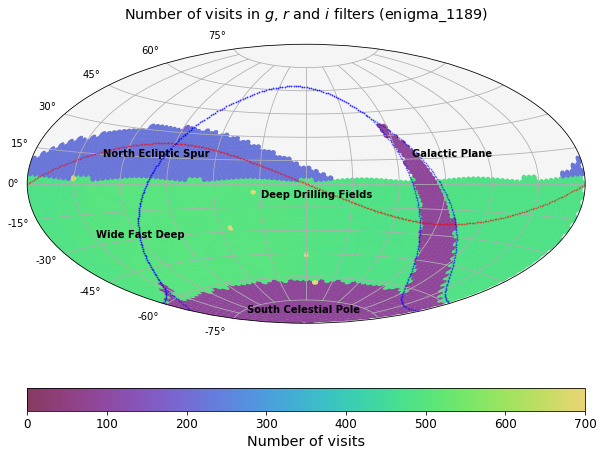

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plotDict = {'colorMin': 0, 'colorMax': 700, 
            'title':r'Number of visits in $g$, $r$ and $i$ filters (%s)' % (opsimName),
            'xlabel':r'Number of visits', 'bgcolor': 'whitesmoke',
            'figsize': (10, 8), 'labelsize':'large', 'fontsize':'x-large'}
bundle.setPlotDict(plotDict)
bundle.plot(plotFunc=plots.BaseSkyMap())
plt.figure(1)
plt.figtext(.22, .5, 'Wide Fast Deep', fontweight='demibold')
plt.figtext(.23, .64, 'North Ecliptic Spur', fontweight='demibold')
plt.figtext(0.66, 0.64, 'Galactic Plane', fontweight='demibold')
plt.figtext(.43, .37, 'South Celestial Pole', fontweight='demibold')
plt.figtext(0.45, 0.57, 'Deep Drilling Fields', fontweight='demibold')
plt.savefig('Nvisits_gri.pdf')